In [1]:
# JobTrend prototype 5 - Comprehension 
# 
# Sila. January 26, 2023

In [49]:
from google.colab import files
uploaded = files.upload()

Saving JobTrendsComprehensionClean.csv to JobTrendsComprehensionClean.csv


In [50]:
# Upload the JobTrendAds_Transformer_Search.csv file
!ls

JobTrendsComprehensionClean.csv  sample_data


In [51]:
# Read Jobfile
import pandas as pd

colnames=['Source.Name','ID', 'Date time', 'Details', 'Region', 'Pers.Komp', 'Pers.Komp.Value','Forstaa', 'Forstaa.Value', 'Erfaring', 'Erfaring.Value', 'Rest'] 
df = pd.read_csv("JobTrendsComprehensionClean.csv", usecols = colnames, encoding="utf-8", sep=';', header = 0 )

# The JobTrend file must saved in utf-8 format

In [52]:
df.rename(columns = {'Rest':'JobAdText'}, inplace = True)
df.rename(columns = {'Pers.Komp':'PersonligeKompetencer'}, inplace = True)
# show the data
print ( df .describe( include = 'all' ))
#the describe is a great way to get an overview of the data
#print ( df .values)

              Source.Name            ID         Date time             Details  \
count                 296  2.960000e+02               296                 296   
unique                296           NaN               289                 242   
top     00031-1805634.txt           NaN  21-02-2020 22:37  Multimediedesigner   
freq                    1           NaN                 2                   8   
mean                  NaN  1.053727e+06               NaN                 NaN   
std                   NaN  5.156326e+05               NaN                 NaN   
min                   NaN  7.153000e+03               NaN                 NaN   
25%                   NaN  6.856040e+05               NaN                 NaN   
50%                   NaN  1.080747e+06               NaN                 NaN   
75%                   NaN  1.446393e+06               NaN                 NaN   
max                   NaN  1.960349e+06               NaN                 NaN   

                    Region 

In [53]:
df.drop('Source.Name' , axis = 1 , inplace = True )
df.drop('Date time' , axis = 1 , inplace = True )
df.drop('Details' , axis = 1 , inplace = True )
df.drop('Region' , axis = 1 , inplace = True )

In [54]:
# Replace No-value with zero on Pers.Komp column
df["PersonligeKompetencer"] = df["PersonligeKompetencer"].fillna(0)
df["Forstaa"] = df["Forstaa"].fillna(0)
df["Erfaring"] = df["Erfaring"].fillna(0)

In [55]:
df['JobAdText'] = df['JobAdText'].apply(str)

for column in df.columns[3:]:
    print(df[column])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
291    0.0
292    0.0
293    0.0
294    0.0
295    0.0
Name: Forstaa, Length: 296, dtype: float64
0                                                    NaN
1                                                    NaN
2                                                    NaN
3      Du har en grundlæggende viden om e-commerce, w...
4                                                    NaN
                             ...                        
291                                                  NaN
292                                                  NaN
293                                                  NaN
294                                                  NaN
295                                                  NaN
Name: Forstaa.Value, Length: 296, dtype: object
0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
291    0.0
292    0.0
293    0.0
294    0.0
295    0.0
Name: Erfaring, Length: 296, dtype: floa

In [11]:
# Could find sentences with regular expressions, SpaCy etc.
# (But) Using nltk here.

In [12]:
from nltk import tokenize

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
nb_personal_qualifications = 0

# For start, only look at 1 row
for row in df.head(1).itertuples():
    AdText = row.JobAdText

    Sentences = tokenize.sent_tokenize(AdText)
    '''doc = nlp(AdText)
    Sentences = []
    for sent in doc.sents:
       Sentences.append(sent.text)'''
    
    # ToDo - This must read from Excel file
    nb_personal_qualifications = int(row[2]) # Pers.Komp

In [15]:
print(nb_personal_qualifications) #print(Sentences)

1


In [16]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 122.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=29df35dbdd957843117718b65a820fbc56510f3ddb7118046dc750eeb73954d7
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [17]:
from sentence_transformers import SentenceTransformer, util

In [19]:
# https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

In [20]:
import numpy as np

In [21]:
def FindkHighestkNumbers(scores, k):
    return (-scores).argsort()[:k]

In [22]:
def PresentAsSubstring(CurrentSentences, LookupSentence, Verbose):
    foundmatch = False
    for value in CurrentSentences:
       # Find
       if (value.find(LookupSentence) != -1):
           if (Verbose==True):
              print(value, " Contains ", LookupSentence)
           foundmatch = True

    return foundmatch 

In [23]:
def QualificationPresentAsSubstring(CurrentSentences, qualifications, Verbose):
  FoundQualificationAsSubstring = False
  for i in range(len(qualifications)):
     Lookup_Sentence= qualifications[i]
     if (PresentAsSubstring(CurrentSentences, Lookup_Sentence, Verbose) == True):
        FoundQualificationAsSubstring = True
     
  return FoundQualificationAsSubstring      

In [24]:
def FindMostSimilarSentence(Corpus, LookupSentence):
    # encode corpus to get corpus embeddings
    corpus_embeddings = model.encode(Corpus, convert_to_tensor=True)
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(LookupSentence, convert_to_tensor=True)# top_k results to return
    top_k=1# compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]# Sort the results in decreasing order and get the first top_k
    # top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k] #CPU
    top_results= FindkHighestkNumbers(cos_scores,top_k) #GPU

    # print("\n", "Sentence:", LookupSentence, "\n")
    # print("Top", top_k, "most similar sentences in corpus:")
    best_result=0
    for idx in top_results[0:top_k]:
       #print(Corpus[idx], "(Score: %.4f)" % (cos_scores[idx]))
       best_result= cos_scores[idx] 

    return Corpus[top_results[0]], best_result

In [26]:
target_sentence = "Har gode kommunikationsevner"

In [27]:
# Test
# FindMostSimilarSentences(Sentences, target_sentence) 
FindMostSimilarSentence(Sentences, target_sentence) 

('Vi forventer, at du:  Har en relevant professionsbachelor i e-handel, er multimediedesigner, markedsføringsøkonom eller grafisk uddannet Har erfaring i brug af InDesign, Illustrator og Photoshop Har gode kommunikationsevner.',
 tensor(0.4166, device='cuda:0'))

In [28]:
personal_qualifications=['Har gode kommunikationsevner',
'Kan arbejde selvmotiverende',
'Du tager ansvar for dine projekter og følger altid dine opgaver til dørs',
'Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.',
'Du er nysgerrig, kritisk og løsningsorienteret - også når det bliver komplekst',
'Du har drive, og passion for kvalitet',
'Du er god til at tænke ud af boksen, er ambitiøst og kreativt tænkende',
'er engageret, har god energi og er en god kollega',
'Som person er du først og fremmest kreativ og du er god til at finde på nye løsninger',
'Du er ansvarsfuld, selvstændig og har mod på at udvikle dig'
'Være initiativrig og opsøgende',
'Ivrig efter af lære Som person forestiller vi os, at du er engageret, kreativ og nysgerrig',
'Du er god til at skabe relationer på tværs',
'er selvstændig og grundig',
'Du har flair for content',
'Du er frisk, nede på jorden og klar på en god snak med dine kollegaer',
'Du trives med rutineprægede opgaver, og bidrager med masser af godt humør',
'Er optimist og ser muligheder fremfor begrænsninger',
'Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen.Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen',
'Som menneske er du udadvendt, opsøgende og pædagogisk',
'Er kvalitetsbevidst og sætter en stolthed i at udføre et godt stykke arbejde',
'Er detaljeorienteret og har en struktureret tilgang til dine arbejdsopgaver',
'Er god til at tale med mennesker og sætte sig ind i deres behov',
'Du er detaljeorienteret til mindste detalje og stortrives med en bred kontaktflade',
'Du er struktureret og har høj selvdisciplin',
'Du udviser en høj grad af uafhængighed, er proaktiv og selvstartende',
'Vi søger en person, der er detaljeorienteret og analytisk stærk',
'Du trives med at være opsøgende Du kan arbejde både selvstændigt og som del af et mindre team',
'er ansvarlig, struktureret og målorienteret samt serviceminded, positiv og imødekommende',
'Kreativ, nysgerrig, initiativrig og ikke bange for at spørge. Struktureret og detaljeorienteret',
'At du har et godt drive, kan arbejde selvstændigt, struktureret og tage ansvar',
'Du er god til at styre din tid og trives med at have mange bolde i luften']

In [29]:
exprerience_qualifications=['Brancheerfaring er en fordel',
            'Du har erfaring med websites',
            'Du har gerne erfaring med SEO-optimering og Facebook annoncering,',
            'Du har gerne erfaring med SEO-optimering og Facebook-annoncering',
            'Du skal have erfaring med CRM-systemer, gerne Sitecore og/eller Umbraco.',
            'Er erfaren bruger af Adobe pakken (InDesign, Illustrator)',
            'Erfaren bruger af Photoshop og InDesign med et godt grafisk øje',
            'erfaring inden for XML og Adobe InDesign',
            'erfaring med Adobe',
            'erfaring med frontend-udvikling inden for finansielle produkter og services, men det er ikke et krav',
            'Erfaring med Illustrator, HTML og CSS',
            'Erfaring med redigering og opbygning af hjemmesider/intranet i CMS',
            'Erfaring med rentegning og udvikling af produktemballage',
            'Erfaring med salg af banner-kampagner eller lign. digitale projekter Erfaring med SEO og marketing på Sociale Medier',
            'Erfaring med salgsledelse eller som key account manager ',
            'erfaring med udarbejdelse af content til de sociale medier.',
            'et par års erhvervserfaring og har en relevant marketing- og salgserfaring',
            'Frontend (CSS, template opsætning mv.)',
            'Gerne erfaring med Adobe Cloud-pakken ',
            'Gerne nogle års erfaring med animation som primær arbejdsopgave',
            'Git og Build tools (Grunt/Webpack) ',
            'Har du erfaring med design og udvikling af multimediale produkter',
            'Har du erfaring med grafisk arbejde i InDesign og/eller Photoshop,',
            'Har du erfaring med grafisk arbejde i InDesign og/eller Photoshop, er det en stor fordel. ',
            'har du erfaring med Photoshop og InDesignTryk-opgaver og vektorgrafikUX og brugervenlighedStort plus',
            'har du god erfaring med Wordpress',
            'har erfaring fra en lignende stilling ',
            'har erfaring indenfor digital marketing, grafisk design til on- og offline medier',
            'har erfaring med Adobe Creative Cloud (InDesign, Illustrationer, Photoshop, Ps, Ai, PrP og Ae',
            'Har erfaring med CMS systemer',
            'Har erfaring med CMS systemer, gerne nogle års erfaring med Sitecore ',
            'har erfaring med Photoshop, InDesign, HubSpot o.l.',
            'Har erfaring med projektstyring og er god til at styre din tid',
            'har erfaring med videoproduktion og -redigering, billedkomposition, lyd, etc. – og gerne med e-learning-programmer',
            'Har erfaring med webdesign',
            'har mindst 2-3 års erfaring',
            'har solid erfaring med Adobe Photoshop, Indesign, Illustrator og Premier Pro']

In [3]:
comprehension_qualifications= ['forståelse for digital markedsføring',
         'fuld kendskab til de sociale medier, særligt Facebook og Instagram',
         'god forståelse af asynkront request-håndtering, AJAX og Fetch API.',
         'har du dyb forståelse for hvordan et digitalt produkt leveres så det ikke kun er teknisk lækkert, men også at brugeroplevelsen er ditto.',
         'Har kendskab til Adobe Illustrator, Microsoft PowerPoint og Microsoft Excel',
         'indgående kendskab til Mailchimp og integrationen mellem disse',
         'kendskab til Adobe CC',
         'kendskab til Motion Graphics, animation og videoproduktion og basics af HTML5',
         'kendskab til platformsøkonomi',
         'kendskab til Sitecore eller programmering ift. Webudvikling',
         'At du har kendskab til Illustrator, InDesign og Photoshop og grafiske opgaver (plakater, udstillingsmateriale og elektroniske reklamer)',
         'Basal HTML',
         'basal viden og forståelse for hjemmesidekodning i html, css og php',
         'Bekendt med analysering af data fra de sociale medier samt Google Analytics',
         'Besidder basalt kendskab til CMS-systemer',
         'Besvare kundehenvendelser på SoMe',
         'Deltage i UngOdenses arbejde med kommunikation',
         'Den daglige planlægning af hjælpere i fotorummet',
         'Design og udvikling af multimediale produkter IT-didaktik og læringsteori User Experience og interaktionsdesign Designpsykologi og adfærdsdesign',
         'Det er vigtigt for os,  at du trives med grafiske opgaver og har et flair for at koble godt grafisk arbejde med teknisk viden',
         'Det vil være en fordel, hvis du har kendskab til PIM-systemet STEP',
         'Du har desuden en stærk marketing- og brandforståelse',
         'Du har en god teknisk forståelse og er en haj til WordPress',
         'Du har en grundlæggende viden om e-commerce, web og B2C-marketing med fokus på den gode brugeroplevelse',
         'Du har en solid viden om sociale medier og kender Facebook og Instagram',
         'Du har et bredt og dybt kendskab til SEO/SEM',
         'Du har et godt indblik i online medier/digital markedsføring',
         'Du har god forståelse for brugervenlighed, UX og typografi',
         'Du har god viden om læring, pædagogik, formidling samt gode kommunikationsevner både mundtlig, skriftligt og visuelt',
         'Du har helt styr på hvordan analyseværktøjer kan forbedre brugeroplevelsen og salg på digitale platforme',
         'Du har kendskab til Adobe programmer - fx InDesign, Illustrator, Photoshop og Premiere Pro',
         'Du har kendskab til klippe- og videoredigeringsværktøjer som f.eks. Indesign, Photoshop, Illustrator og Premiere Pro',
         'Du har kendskab til lettere programmering',
         'evt. kendskab til HTML5 og CSS',
         'fordel at have en smule kendskab til netværk, server og webshops og kunne hjælpe med mindre in-house supportopgaver',
         'Forretningsforståelse ']

In [30]:
def FindPersonalQualificationsVerbose(Corpus):
  for i in range(len(personal_qualifications)):
     Lookup_Sentence=personal_qualifications[i]
     bestmatch, bestmatchvalue = FindMostSimilarSentence(Sentences, Lookup_Sentence)
     print(Lookup_Sentence)
     print(bestmatch, bestmatchvalue)

In [31]:
# Find best matches, above threshold

In [32]:
def FindQualifications(Corpus, qualifications):
  highvalue=0
  highestmatchedsentence=""
  highestlookup=""
  for i in range(len(qualifications)):
     Lookup_Sentence= qualifications[i]
     bestmatch, bestmatchvalue = FindMostSimilarSentence(Corpus, Lookup_Sentence)

     if bestmatchvalue.cpu().detach().numpy()>highvalue: 
        highvalue = bestmatchvalue.cpu().detach().numpy() 
        highestmatchedsentence = bestmatch
        highestlookup=Lookup_Sentence
  return highestmatchedsentence,highestlookup,highvalue

In [33]:
def FindTopQualification(Corpus, qualifications, typeofqualification, UseVerbose):
    highestmatchedsentence,highestlookup,highvalue = FindQualifications(Corpus, qualifications)

    if UseVerbose == True:
       print("\n")
       print(typeofqualification,"qualifications in JobAds.")
    
    print("Match :", highestmatchedsentence)
    print('Lookup: ', highestlookup)
    print('Match: ', "(Score: %.4f)" % (highvalue))

    return highvalue

In [34]:
FindTopQualification(Sentences, personal_qualifications, "Personal", True)



Personal qualifications in JobAds.
Match : Har du flair for at arbejde med content og sociale medier?
Lookup:  Du har flair for content
Match:  (Score: 0.6140)


array(0.6139574, dtype=float32)

In [35]:
def FindTopQualificationsForDataSet(threshold):
   true_positives = 0
   false_negatives = 0
   false_positives = 0
   true_negatives = 0
   ad_number=1
   # Run Through entire dataset 
   for row in df.head(100).itertuples():
       AdText = row.JobAdText

       Sentences = tokenize.sent_tokenize(AdText)

       # This must be read from Excel file
       nb_comprehend_qualifications = int(row.Forstaa)
       y_real.append(row.Forstaa)

       ad_number += 1
       print("Ad number: ", ad_number)
        
       '''matchingvalue = 0
       MatchAsSubString = QualificationPresentAsSubstring(Sentences, personal_qualifications, True)
       if (MatchAsSubString== True):
           print("Exact match. Assume matching value equal to 1")
           matchingvalue = 1 
           y_predicted.append(1)
       else:'''
       matchingvalue = FindTopQualification(Sentences, comprehension_qualifications, "Comprehension", False)
       if (matchingvalue>threshold):
          y_predicted.append(1)
       else:
          y_predicted.append(0)

       if (nb_comprehend_qualifications==1):
          if (matchingvalue<threshold):
              print("WRONG")
       else:
          if (matchingvalue>threshold):
              print("WRONG")

       if nb_comprehend_qualifications == 1:
           if (matchingvalue>threshold): 
              true_positives += 1
           else:
              false_negatives += 1
       else:
           if (matchingvalue>threshold): 
              false_positives += 1
           else:
              true_negatives += 1
              
   return true_positives, false_negatives, false_positives, true_negatives

In [56]:
y_real=[]
y_predicted=[]
true_positives, false_negatives, false_positives, true_negatives = FindTopQualificationsForDataSet(0.7)

if (false_positives + true_negatives) != 0:   
    if (true_positives + false_negatives) != 0:  
        print("False postive rate: ", (false_positives / float(false_positives + true_negatives)))
        print("True postive rate: ", (true_positives / float(true_positives + false_negatives)))

Ad number:  2
Match : Har du flair for at arbejde med content og sociale medier?
Lookup:  Du har en solid viden om sociale medier og kender Facebook og Instagram
Match:  (Score: 0.6899)
Ad number:  3
Match : Støtte til at få skabt struktur omkring hverdagen på studiet • Vejledning – fx i forhold til opgaveskrivning og studieteknik • Støtte til at opnå overblik over deadlines, afleveringer, undervisning m.m.
Lookup:  At du har kendskab til Illustrator, InDesign og Photoshop og grafiske opgaver (plakater, udstillingsmateriale og elektroniske reklamer)
Match:  (Score: 0.5328)
Ad number:  4
Match : Du brænder for at arbejde med tekniske problemløsninger i WordPress og kode Ser det som en selvfølge at yde høj service og kvalitet til kunderne nyuddannet eller selvlært.
Lookup:  har du dyb forståelse for hvordan et digitalt produkt leveres så det ikke kun er teknisk lækkert, men også at brugeroplevelsen er ditto.
Match:  (Score: 0.5903)
Ad number:  5
Match : Vi ønsker os en stilsikker multime

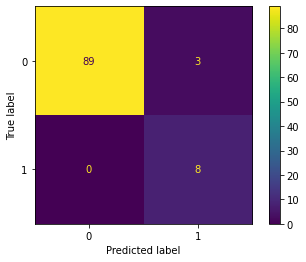

In [58]:
# For the JobTrendComprehension.csv file we get:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_real, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [59]:
import matplotlib.pyplot as plt
import numpy as np


def PlotRocCurve():

   # false positive rate
   fpr = []
   # true positive rate
   tpr = []
   # Iterate thresholds from 0.0, 0.1, ... 1.0
   thresholds = np.arange(0.0, 1.01, .1)

   # iterate through all thresholds and determine fraction of true positives
   # and false positives found at this threshold
   for thresh in thresholds:       
       true_positives, false_negatives, false_positives, true_negatives = FindTopQualificationsForDataSet(thresh)

       if (false_positives + true_negatives) != 0:   
         if (true_positives + false_negatives) != 0:  
            fpr.append(false_positives / float(false_positives + true_negatives))
            tpr.append(true_positives / float(true_positives + false_negatives))
     
   plt.scatter(fpr, tpr)

   ypoints = np.array([0, 1])
   plt.plot(ypoints, linestyle = 'dotted')

   plt.show()

   return fpr, tpr

Streaming af output blev afkortet til de sidste 5000 linjer.
Match : - Produktfotografering/videooptagelse og efterbehandling af disse - Udarbejdelse af grafik, præsentationer ol.
Lookup:  Design og udvikling af multimediale produkter IT-didaktik og læringsteori User Experience og interaktionsdesign Designpsykologi og adfærdsdesign
Match:  (Score: 0.6024)
WRONG
Ad number:  8
Match : Dine opgaver:  Ansvar for opbygning af bibliotekets nye designsystem, herunder interaktionsdesign på kb.dk Udvikling af design og identitet på bibliotekets andre digitale platforme Vedligehold på diverse platforme Bidrag til wireframing, mock-ups og prototyping i tværgående udviklings- og projektteams.
Lookup:  Design og udvikling af multimediale produkter IT-didaktik og læringsteori User Experience og interaktionsdesign Designpsykologi og adfærdsdesign
Match:  (Score: 0.6185)
WRONG
Ad number:  9
Match : Du har en lyst til at afprøve og videreudvikle dine mange kompetencer - Dette i en opgave hvor du virkel

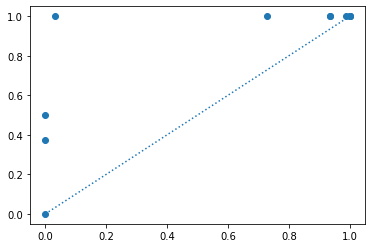

In [60]:
y_real=[]
y_predicted=[]
fpr, tpr = PlotRocCurve()

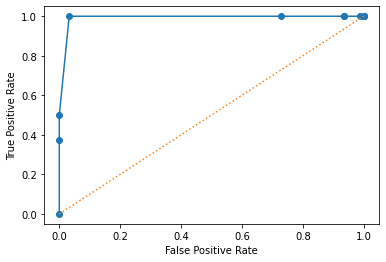

In [61]:
#create ROC curve
plt.scatter(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ypoints = np.array([0, 1])
plt.plot(ypoints, linestyle = 'dotted')
plt.show()